# 04 그래프 그리기

## 04-3 seaborn 라이브러리

### 다변량 그래프 - 히스토그램
tips 데이터
* subplots() 로 기본 틀 만들기
* distplot() 으로 열 데이터 전달

In [1]:
import seaborn as sns
tips = sns.load_dataset('tips')
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### 히스토그램 + 밀집도

Text(0.5, 1.0, 'Total Bill Histogram with Density Plot')

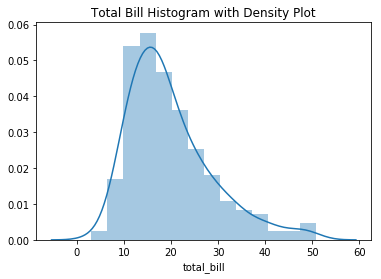

In [3]:
import matplotlib.pyplot as plt

ax = plt.subplots()
ax = sns.distplot(tips['total_bill'])
ax.set_title('Total Bill Histogram with Density Plot')

#### 히스토그램

Text(0, 0.5, 'Frequency')

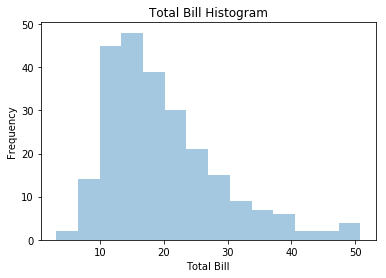

In [4]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], kde=False)
ax.set_title('Total Bill Histogram')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Frequency')

#### 밀집도

Text(0, 0.5, 'Unit Probability')

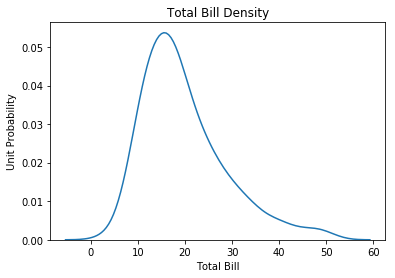

In [5]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], hist=False)
ax.set_title('Total Bill Density')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Unit Probability')

#### 히스토그램 + 밀집도 + 양탄자(rug)

Text(0.5, 0, 'Total Bill')

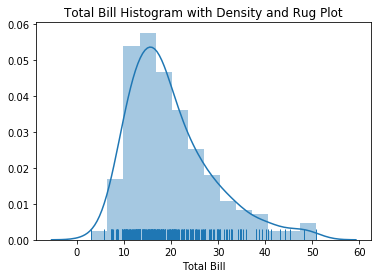

In [6]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], rug=True)
ax.set_title('Total Bill Histogram with Density and Rug Plot')
ax.set_xlabel('Total Bill')

#### count 그래프

Text(0, 0.5, 'Frequency')

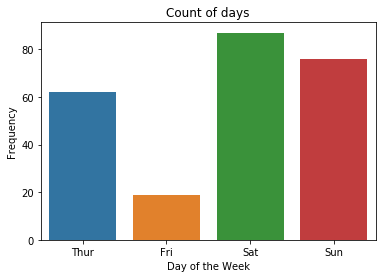

In [7]:
ax = plt.subplots()
ax = sns.countplot('day', data=tips)
ax.set_title('Count of days')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Frequency')

In [8]:
tips['day'].unique()

[Sun, Sat, Thur, Fri]
Categories (4, object): [Sun, Sat, Thur, Fri]

### 이변량 그래프

#### 산점도 + 회귀선

Text(0, 0.5, 'Tip')

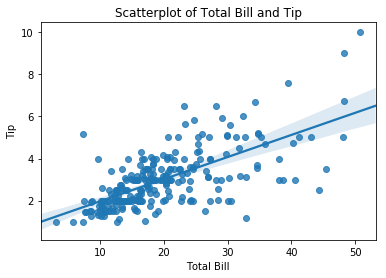

In [10]:
ax = plt.subplots()
ax = sns.regplot(x='total_bill', y='tip', data=tips)
ax.set_title('Scatterplot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

#### 산점도

Text(0, 0.5, 'Tip')

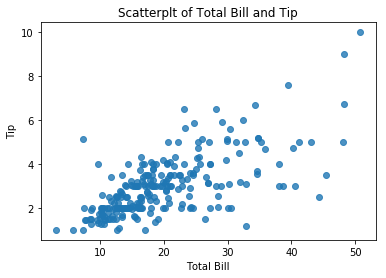

In [11]:
ax = plt.subplots()
ax = sns.regplot(x='total_bill', y='tip', data=tips, fit_reg=False)
ax.set_title('Scatterplt of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

#### 산점도 + 히스토그램 - jointplot()

Text(0.5, 1.03, 'Joint Plot of Total Bill and Tip')

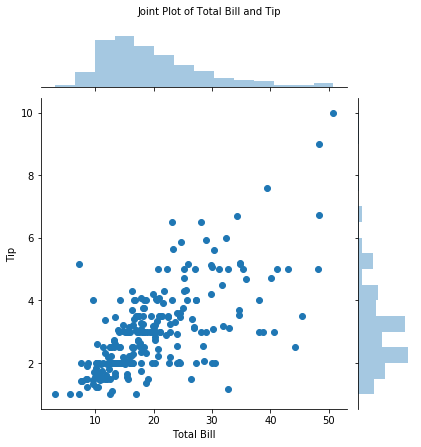

In [14]:
joint = sns.jointplot(x='total_bill', y='tip', data=tips)
joint.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
joint.fig.suptitle('Joint Plot of Total Bill and Tip', fontsize=10, y=1.03)

#### 육각그래프

Text(0.5, 1.03, 'Hexbin Joint Plot of Total Bill and Tip')

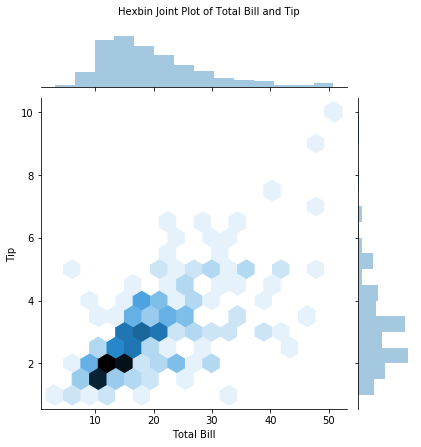

In [16]:
hexbin = sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')
hexbin.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
hexbin.fig.suptitle('Hexbin Joint Plot of Total Bill and Tip', fontsize=10, y=1.03)

#### 이차원 밀집도 - kdeplot()

Text(0, 0.5, 'Tip')

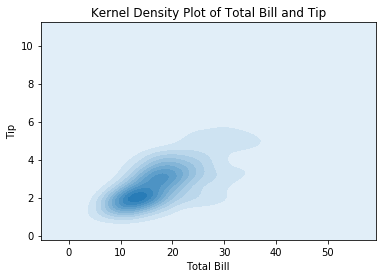

In [17]:
ax = plt.subplots()
ax = sns.kdeplot(data=tips['total_bill'],
                data2=tips['tip'],
                shade=True)
ax.set_title('Kernel Density Plot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

#### 바 그래프 - barplot()

Text(0, 0.5, 'Average total bill')

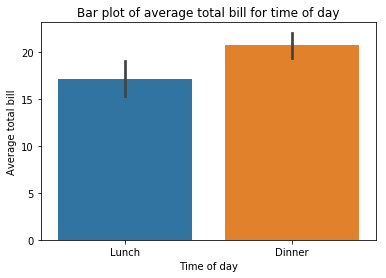

In [18]:
ax = plt.subplots()
ax = sns.barplot(x='time', y='total_bill', data=tips)
ax.set_title('Bar plot of average total bill for time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Average total bill')

#### 박스 그래프 - boxplot()

Text(0, 0.5, 'Total Bill')

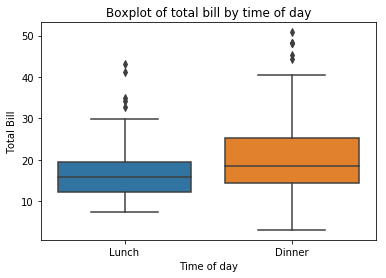

In [19]:
ax = plt.subplots()
ax = sns.boxplot(x='time', y='total_bill', data=tips)
ax.set_title('Boxplot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')

#### 바이올린 그래프 - violinplot()

Text(0, 0.5, 'Total Bill')

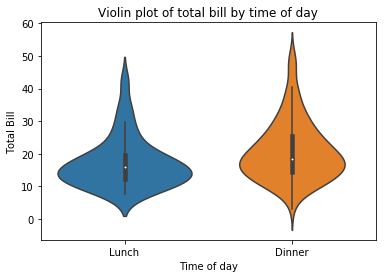

In [20]:
ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill', data=tips)
ax.set_title('Violin plot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')

#### 관계 그래프 - pairplot()

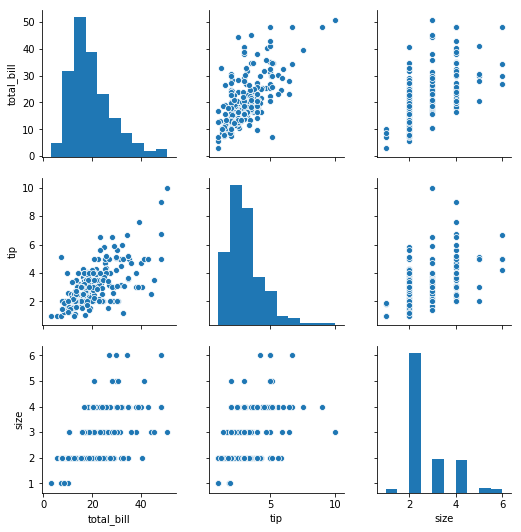

In [21]:
fig = sns.pairplot(tips)

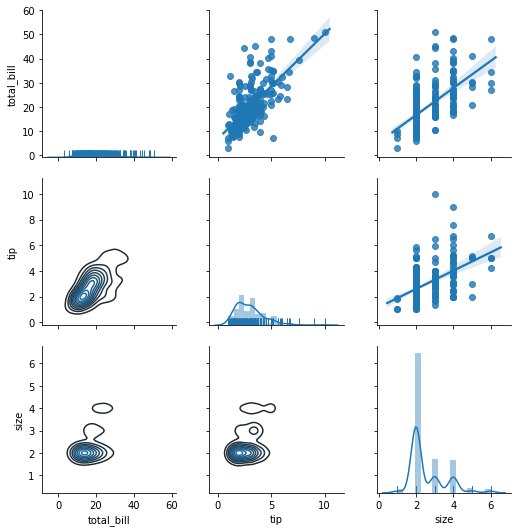

In [22]:
pair_grid = sns.PairGrid(tips)
pair_grid = pair_grid.map_upper(sns.regplot)
pair_grid = pair_grid.map_lower(sns.kdeplot)
pair_grid = pair_grid.map_diag(sns.distplot, rug=True)
plt.show()

### 다변량 그래프

#### 바이올린 그래프 + 색상 추가

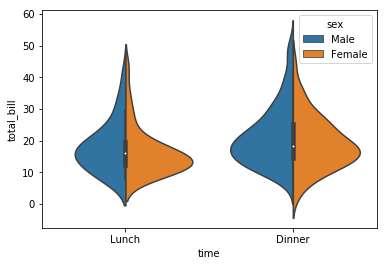

In [25]:
ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True)

#### 산점도, 관계 그래프 + 색상추가

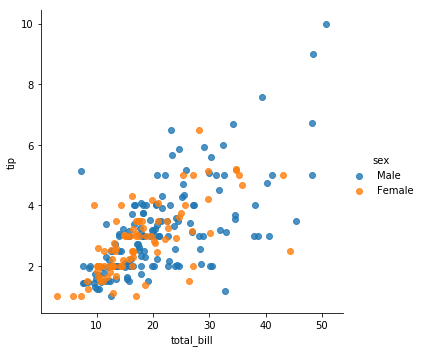

In [26]:
scatter = sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', fit_reg=False)

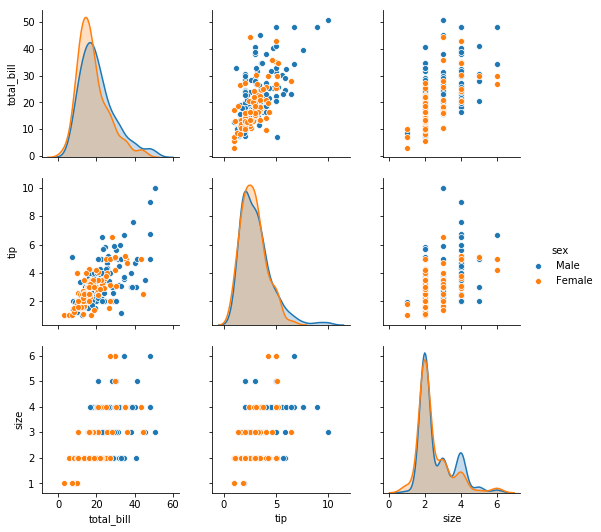

In [27]:
fig = sns.pairplot(tips, hue='sex')

#### 산점도 그래프 크기 모양 조절

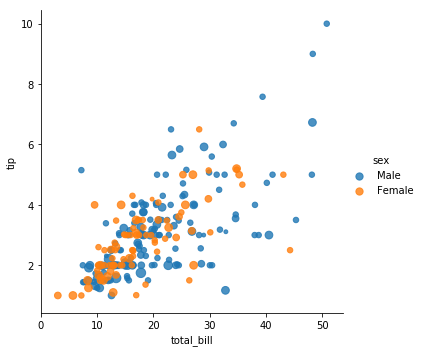

In [29]:
scatter = sns.lmplot(x='total_bill', y='tip', data=tips, fit_reg=False, hue='sex',
                    scatter_kws={'s':tips['size']*15})

#### 산점도 그래프 기호

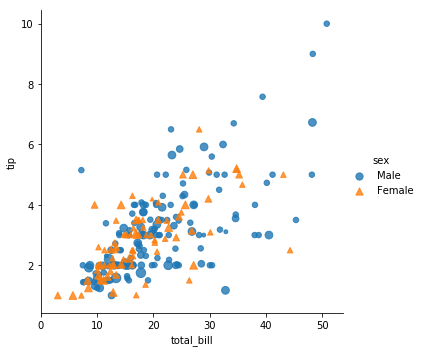

In [33]:
scatter = sns.lmplot(x='total_bill', y='tip', data=tips, fit_reg=False, hue='sex',
                    markers=['o', '^'], scatter_kws={'s':tips['size']*15})

#### 산점도 그래프 4개 한 번에

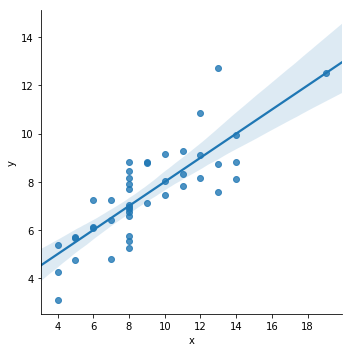

In [37]:
anscombe_plot = sns.lmplot(x='x', y='y', data=anscombe)

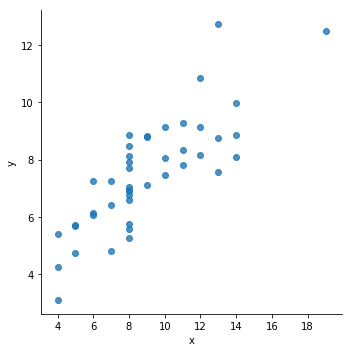

In [35]:
anscombe = sns.load_dataset('anscombe')
anscombe_plot = sns.lmplot(x='x', y='y', data=anscombe, fit_reg=False)

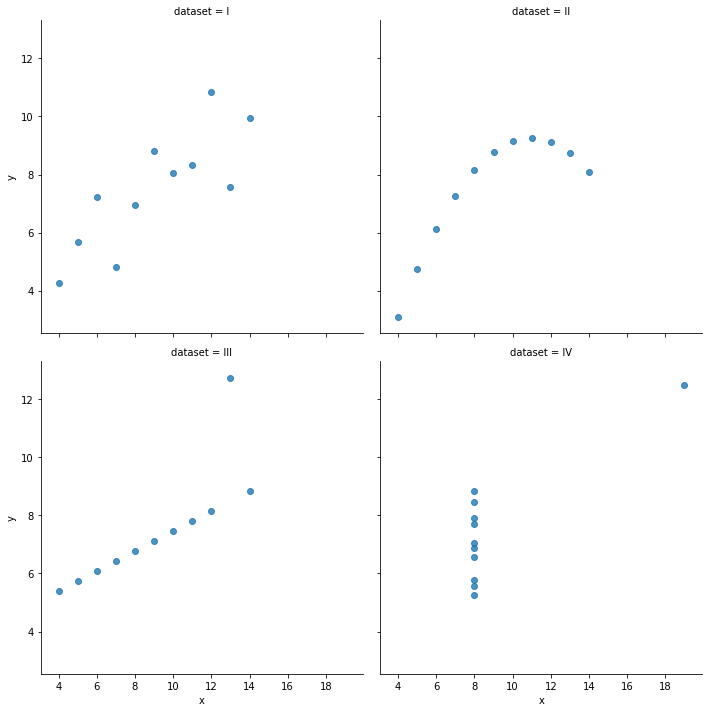

In [36]:
anscombe_plor = sns.lmplot(x='x', y='y', data=anscombe, fit_reg=False,
                          col='dataset', col_wrap=2)

#### FacetGrid() - 히스토그램

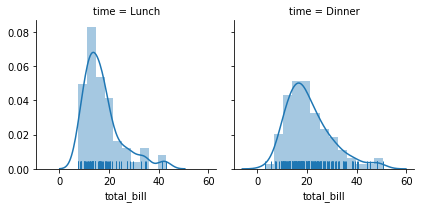

In [38]:
facet = sns.FacetGrid(tips, col='time')
facet.map(sns.distplot, 'total_bill', rug=True)

#### 다변량 그래프 산점도

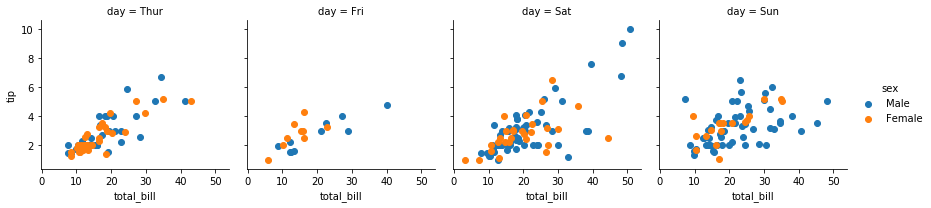

In [39]:
facet = sns.FacetGrid(tips, col='day', hue='sex')
facet = facet.map(plt.scatter, 'total_bill', 'tip')
facet = facet.add_legend()

#### FacetGrid() - 산점도

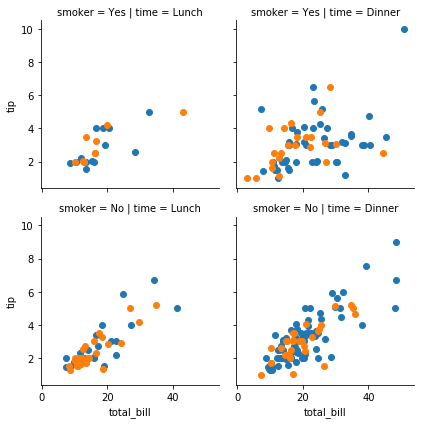

In [40]:
facet = sns.FacetGrid(tips, col='time', row='smoker', hue='sex')
facet.map(plt.scatter, 'total_bill', 'tip')

## 04-5 seaborn 라이브러리 그래프 스타일 설정

### set_style()
* whitegrid
* darkgrid
* dark
* white
* ticks

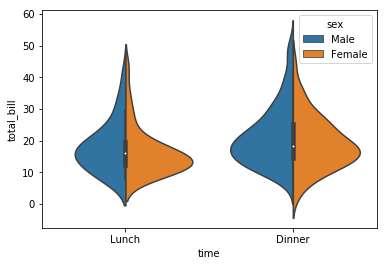

In [42]:
fig, ax =plt.subplots()
ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True)

#### whitegrid

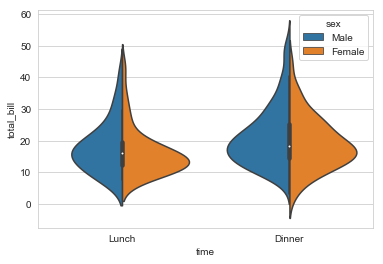

In [43]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True)

#### darkgrid

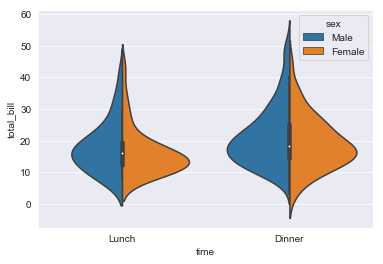

In [47]:
sns.set_style('darkgrid')
fig, ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True)

#### for문 적용

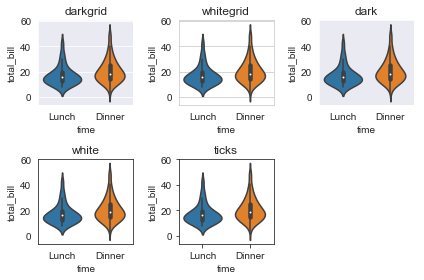

In [49]:
fig = plt.figure()

seaborn_styles = ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks']

for idx, style in enumerate(seaborn_styles):
    plot_position = idx + 1
    with sns.axes_style(style):
        ax = fig.add_subplot(2, 3, plot_position)
        violin = sns.violinplot(x='time', y='total_bill', data=tips, ax=ax)
        violin.set_title(style)
        
fig.tight_layout()